# Première analyse du dataset

## Quelques informations sur les données

L’objectif est de développer **un modèle performant** pour prédire la **variable Output** en fonction des **autres variables pertinentes**. La plupart des variables ont un nom décrivant l’information contenue.

 

**Quelques informations :**

* Les variables finissant en _M : variables calculées au mois M
* Les variables finissant en _MY : variables calculées au mois M-Y
* Les variables finissant en _XM : variables calculées sur les mois M-X au mois M 



### Librairies pour l'analyse

In [157]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

# 1.Lecture du fichier & Reformattages
## Chargement des données

In [19]:
df = pd.read_csv('Dataset_test_ILB.csv',encoding="latin1",sep=';',decimal=',')
# Encodage latin1 car le fichier n'est pas encodé en UTF8, selection de "," en séparateur décimal

## 1.1  Analyse du format

In [24]:
df.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,"4715,49819",732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,"6584,320922",1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,"-7792,256696",34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,2277.193995,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,"6118,791869",1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,8280.325647,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,"-4266,843489",27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,59977.521970,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


In [181]:
df.shape

(3015, 28)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3015 entries, 0 to 3014
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    3015 non-null   int64  
 1   Nombres_adultes                       3005 non-null   float64
 2   Nombre_personnes_foyer                3006 non-null   float64
 3   Age_2eme_personne                     3013 non-null   float64
 4   Note_credit                           3010 non-null   float64
 5   Encours_credit_bool                   2993 non-null   object 
 6   Encours_credit_value                  2970 non-null   float64
 7   ID_PP                                 3008 non-null   object 
 8   Encours_credit_habitat                3011 non-null   float64
 9   Montant_flux_crediteur_M1             3011 non-null   float64
 10  Montant_obligations                   3011 non-null   float64
 11  Montant_operation

La majorité des colonnes qui contiennt des float ont bien été converties, sauf **Encours_credit**
> **Encours_credit**: Argent qui a été prêté mais qui n'a pas encore été remboursé.

### [Encours_credit]  - Reformattage

In [120]:
df.Encours_credit[14:34]

14    PAS DENCOURS
15    -4648,965858
16     9654,794858
17    -14351,44645
18    -1636,208879
19    -9442,465683
20    -8047,237148
21    -2059,018592
22     3981,916098
23     -2517,34467
24    -6878,210721
25     182,6623636
26    -5287,245058
27    -10360,55858
28      11300,4433
29    -3482,976268
30     10768,15036
31    -18316,31167
32     2641,386869
33             NaN
Name: Encours_credit, dtype: object

<br>
On comprend mieux pourquoi la conversion n'a pas pu se faire: il faut prendre en compte les personnes qui n'ont pas d'encours credit (PAS DENCOURS), ou pour lesquels on ne connaît pas l'information (NaN)

#### Formattage d'encours_credit

Pour que l'encours credit garde son sens, je propose de séparer cette colonne en deux colonnes : 

| Encours_credit_bool             | Encours_credit_value |
| ------------------------------- | -------------------- |
| True                            | -1151                |
| False (Remplace 'PAS DENCOURS') | NaN                  |



In [76]:
"""Création de deux array encours_credit_bool & encours_credit_value """
def create_encours_credit_bool_and_value(df):
    encours_credit = df['Encours_credit'].tolist()
    """Fonction qui construit les deux array évoqués ci-dessus"""
    encours_credit_bool = [True]*len(encours_credit)
    encours_credit_value =[np.nan]*len(encours_credit)
    for (i,encours) in enumerate(encours_credit): 
        """Parcourt la liste encours_credit : encours est un str pour le moment"""
        if encours =="PAS DENCOURS":
            encours_credit_bool[i] = False
        else : 
            """Il y a bien un encours, il va falloir convertir le str en float : attention sep ',' """
            try :
                """Il se peut que encours soit un NaN c'est pourquoi on utilise try & except"""
                encours_float = '.'.join(encours.split(',')) # Utilisation de split pour la conversion
                encours_float = float(encours_float)
                encours_credit_value[i] = encours_float
            except : 
                encours_credit_bool[i] = np.nan
                
    """On peut renvoyer les array"""
    return(encours_credit_bool,encours_credit_value)

In [75]:
encours_credit_bool,encours_credit_values = create_encours_credit_bool_and_value(df)

**On vérifie si la structure est conforme à ce que nous avions envisagé**

In [86]:
encours = pd.DataFrame(zip(encours_credit_bool,encours_credit_values),columns=['Encours_credit_bool','Encours_credit_value'])

In [182]:
encours.iloc[13:34,:]
## Le reformattage a bien fonctionné

,Encours_credit_bool,Encours_credit_value
13,True,5286.493638
14,False,NaN
15,True,-4648.965858
16,True,9654.794858
17,True,-14351.446450
18,True,-1636.208879
19,True,-9442.465683
20,True,-8047.237148
21,True,-2059.018592
22,True,3981.916098


#### Modification d'encours credit dans le dataframe

In [108]:
df1 = df.copy()

On va insérer notre notre dataframe encours à la place de 'Encours_credit'

In [109]:
df1.iloc[:2,:5]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit
0,2911,2.057430,2.070880,91.042848,0.177448
1,1398,2.060715,2.193722,90.715413,-0.062708


In [110]:
encours.head(2)

,Encours_credit_bool,Encours_credit_value
0,True,4715.498190
1,True,6584.320922


In [111]:
df1.iloc[:2,6:]

,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,Montant_operation_crediteur_DAV_M,Montant_operation_debiteur_DAV_M1,Montant_operation_debiteur_DAV_M,Montant_retrait_carte_M,Montant_retrait_carte_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,5897.737602,4498.397638,7930.203493,4997.109487,9488.923224,31.338746,25.008051,...,0.160537,0.094456,262736.7614,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,55655.446030,1890.630239,-1655.250533,1669.661800,1494.971252,-0.191790,-3.399387,...,-0.172851,-0.170338,157962.6467,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX


In [114]:
def concat_df_encours(df,encours):
    """On sépare df en deux parties, encours_credit étant la 6 colonne de df"""
    part1 = df.iloc[:,:5]
    part2 = df.iloc[:,6:]
    df1 = pd.concat([part1,encours],axis=1)
    df1 = pd.concat([df1,part2],axis=1)
    return(df1)

In [116]:
df1 = concat_df_encours(df,encours)

In [117]:
df1.head()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
0,2911,2.057430,2.070880,91.042848,0.177448,True,4715.498190,732f2de9240c404122f8c97b952c4cb8be8ede7f,2772.907651,9005.374276,...,0.160537,0.094456,262736.76140,46.683372,41.184480,48.057303,28.811906,5757.583993,124370.2918,FAUX
1,1398,2.060715,2.193722,90.715413,-0.062708,True,6584.320922,1cc77d640ec2c383bef7099ff331d2ae962fd712,7094.588072,5047.824214,...,-0.172851,-0.170338,157962.64670,6.806368,9.210575,12.027955,-8.664351,2825.730247,130015.4600,FAUX
2,1793,1.930472,1.946847,90.588554,-0.094438,True,-7792.256696,34d7809e534d6e7d83e1439cd4032201386fe9dd,-7613.883523,-692.852208,...,-0.037880,-0.086625,-26034.01144,3.442761,4.988904,7.072354,-21.135796,1679.601033,130904.7126,FAUX
3,1193,1.963631,1.916677,89.300012,-0.286729,True,6118.791869,1539c6f04d9403928ef4e5b662490bd4787ad71d,5874.214001,1408.588664,...,0.994902,0.001148,336491.25330,-6.298359,-7.873857,-9.758806,-6.232009,4059.963478,123729.3778,FAUX
4,1342,2.009754,2.019892,87.706161,0.284325,True,-4266.843489,27524f055875f70d102006ee6dcb360e982c4a69,-4459.202674,-889.296675,...,-0.027045,0.080714,-10631.26532,3.056277,4.414500,5.862660,-28.520162,1719.696619,126770.7544,FAUX


**[Modification de encours credit]**
> A l'issue de cette première partie nous avons pu retravailler le dataframe et notamment la colonne "Encours_credit" afin de simplifier l'analyse

## 1.2 - Répartition des données et outliers

##### Maintenant que nous avons pu charger correctement le datasets, il faut regarder s'il y a des anomalies dans le jeu de données

In [183]:
df.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3015.000000,3005.000000,3006.000000,3.013000e+03,3010.000000,2970.000000,3011.000000,3011.000000,3.011000e+03,3002.000000,...,3008.000000,3011.000000,3010.000000,3.009000e+03,2994.000000,2994.000000,2996.000000,3006.000000,3009.000000,3008.00000
mean,1505.492206,1.651430,2.139211,2.247984e+03,4.087619,67733.356217,66183.088854,3430.032454,1.057915e+04,8039.496539,...,25.181340,0.141723,0.150699,1.941102e+05,21.343223,26.634469,33.320717,102.902545,4069.769709,129798.31574
std,869.645684,3.073339,1.130802,7.714272e+04,3.901568,97274.363255,97054.712799,12601.220620,3.639671e+04,34477.188935,...,127.211080,0.815417,0.976184,2.198428e+06,42.840104,57.345026,74.547646,151.341643,17200.093454,50784.99592
min,0.000000,-45.154000,0.628834,-1.014041e+01,-1.243272,-35268.964050,-35446.980780,-12073.545780,-1.111274e+04,-7999.359456,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.56655
25%,752.500000,1.023015,1.099215,1.193945e+00,0.060387,-49.319006,-1058.635777,-355.231937,1.663585e+02,8.222620,...,-8.283941,-0.045147,-0.050422,-4.443938e+04,0.940546,1.122001,1.411483,7.331611,494.447401,124794.80720
50%,1506.000000,1.958080,1.979002,3.295269e+01,6.071823,15300.678100,12956.683190,2173.796979,4.705268e+03,2600.692478,...,1.666568,0.010977,0.006696,7.685730e+04,6.721483,8.460031,10.834154,57.338650,1963.882364,129489.98350
75%,2259.500000,2.011098,2.634577,4.842538e+01,6.646759,122237.835025,121627.982600,5120.094253,9.941821e+03,5664.498512,...,12.740980,0.066336,0.073643,2.001135e+05,23.635741,29.717792,36.966530,150.928176,3801.005236,134389.96840
max,2999.000000,157.000000,8.029462,3.651695e+06,14.147356,779946.571100,779588.699300,397248.044000,1.003670e+06,462366.112900,...,2406.320620,17.061262,23.098115,1.001995e+08,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.89020


#### Analyse skewnesss & kurtosis

In [197]:
df.kurtosis()

ID                                        -1.203816
Nombres_adultes                         2199.171060
Nombre_personnes_foyer                     1.278666
Age_2eme_personne                       1762.293174
Note_credit                               -0.682750
Encours_credit_bool                      125.349489
Encours_credit_value                       4.361706
Encours_credit_habitat                     4.222435
Montant_flux_crediteur_M1                482.733860
Montant_obligations                      235.537070
Montant_operation_crediteur_DAV_M1        97.174882
Montant_operation_crediteur_DAV_M        170.406959
Montant_operation_debiteur_DAV_M1         95.066300
Montant_operation_debiteur_DAV_M          52.424950
Montant_retrait_carte_M                   52.794028
Montant_retrait_carte_M1                  82.508977
Nombre_retrait_carte_M1                  200.900050
Nombre_retrait_carte_M1,1                292.672115
Quantité_obligations                    1508.302663
Nombre_conne

In [202]:
df.skew().index[1:]

Index(['Nombres_adultes', 'Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value',
       'Encours_credit_habitat', 'Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1',
       'Quantité_obligations', 'Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M', 'Montant_flux_crediteur_M',
       'Montant_pret_banque'],
      dtype='object')

Afin de se familiariser avec le dataset nous allons afficher chacune des composantes

Nombres_adultes - sk : 41.0 - kurt :2199.0  | 


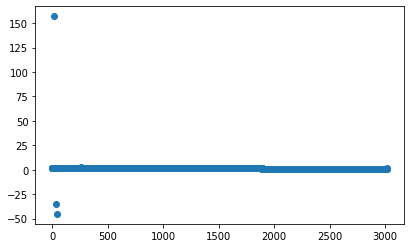

Age_2eme_personne - sk : 40.0 - kurt :1762.0  | Nombre_personnes_foyer - sk : 1.0 - kurt :1.0


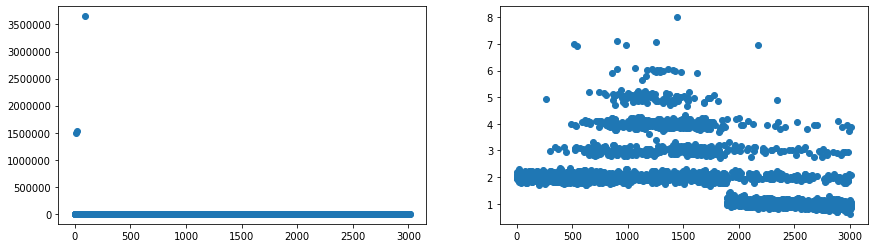

Encours_credit_bool - sk : -11.0 - kurt :125.0  | Note_credit - sk : 0.0 - kurt :-1.0


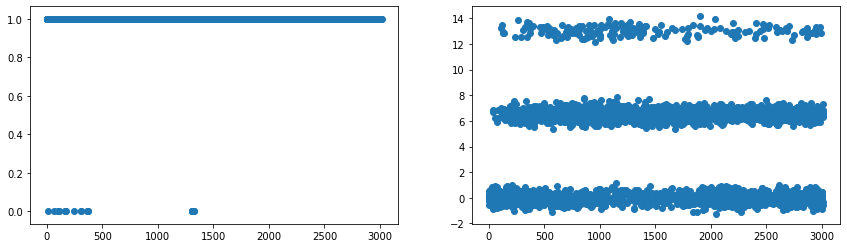

Encours_credit_habitat - sk : 2.0 - kurt :4.0  | Encours_credit_value - sk : 2.0 - kurt :4.0


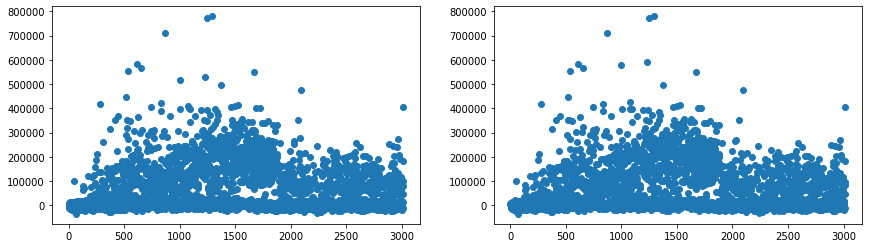

Montant_obligations - sk : 12.0 - kurt :236.0  | Montant_flux_crediteur_M1 - sk : 19.0 - kurt :483.0


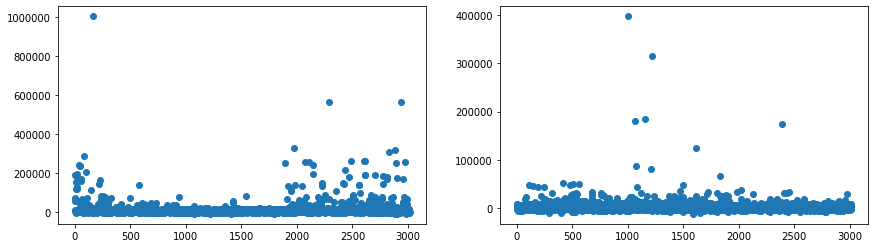

Montant_operation_crediteur_DAV_M - sk : 11.0 - kurt :170.0  | Montant_operation_crediteur_DAV_M1 - sk : 9.0 - kurt :97.0


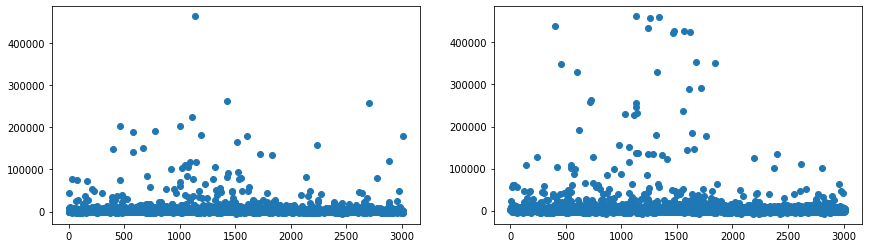

Montant_operation_debiteur_DAV_M - sk : 7.0 - kurt :52.0  | Montant_operation_debiteur_DAV_M1 - sk : 9.0 - kurt :95.0


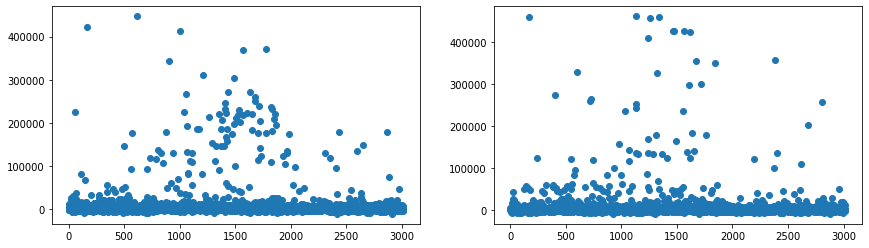

Montant_retrait_carte_M1 - sk : 8.0 - kurt :83.0  | Montant_retrait_carte_M - sk : 7.0 - kurt :53.0


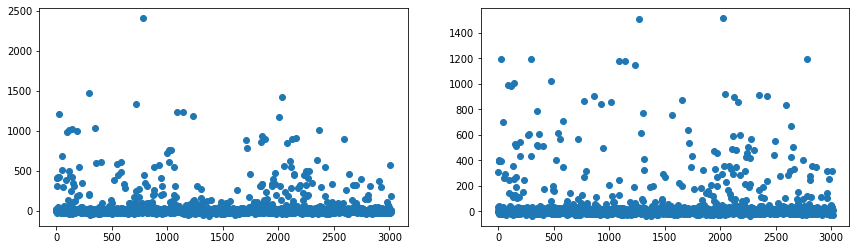

Nombre_retrait_carte_M1,1 - sk : 15.0 - kurt :293.0  | Nombre_retrait_carte_M1 - sk : 12.0 - kurt :201.0


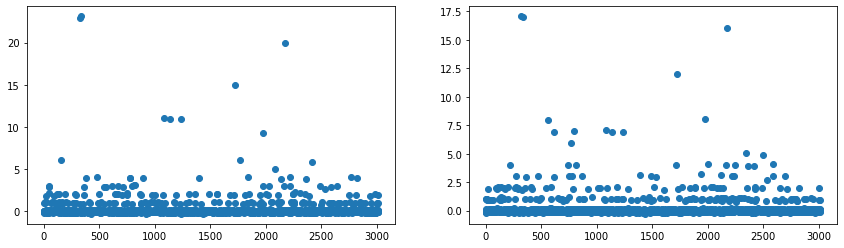

Nombre_connexion_appli_6M - sk : 6.0 - kurt :76.0  | Quantité_obligations - sk : 36.0 - kurt :1508.0


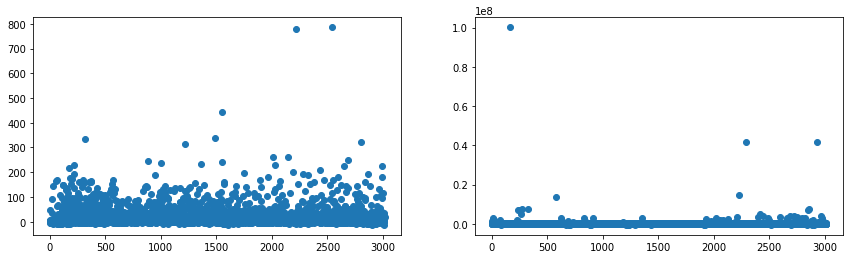

Nombre_connexion_site_6M - sk : 10.0 - kurt :184.0  | Nombre_de_connexion_appli_semaine_6M - sk : 9.0 - kurt :154.0


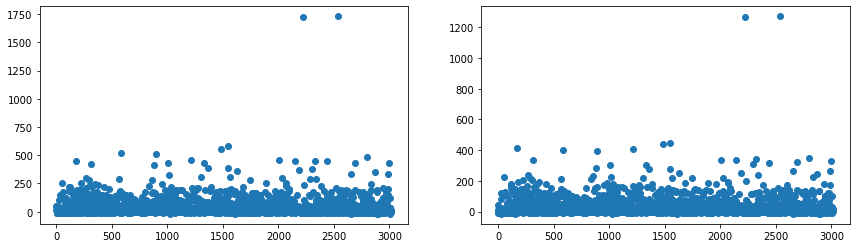

Montant_flux_crediteur_M - sk : 16.0 - kurt :287.0  | Duree_connexion_moyenne_6M - sk : 4.0 - kurt :31.0


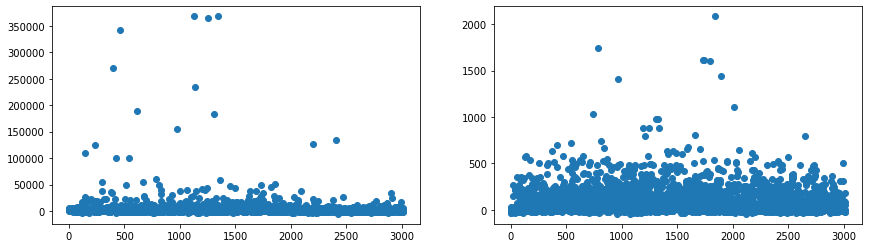

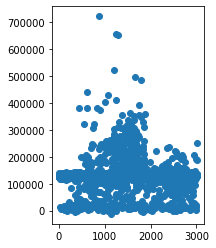

In [246]:
subplot_pos =[121,122] ## Subplot 2 par ligne
legends =['',''] # Pour stocker la legende de chaque plot de la ligne
for (i,cols) in enumerate(df.skew().index[1:]):
    ## Selection de toutes les features sauf ID
    plt.subplot(subplot_pos[i%2])
    legend = f'{cols} - sk : {round(df.skew().values[i+1])} - kurt :{round(df.kurtosis().values[i+1])}'
    legends[i%2] = legend 
    plt.scatter(df.index,df[cols])
    if i%2==0: ## Fin de ligne on affiche
        print('  | '.join(legends))
        plt.subplots_adjust(right = 2)
        plt.show()

On remarque **3 features** ont un **kurtosis & une skewness très élevé** - le plot confirme la présence d'**outliers**:

**Pour ces deux features, ils est nécessaire de se séparer de tous les outliers, car elles n'ont pas de sens, par exemple : max(Nombres_adultes) = 157, ce qui ne fait pas sens**

* Nombres_adultes
* Age_2e_personne

**Pour cette feature, on va uniquement enlever le maximum (1 000 000)**
* Quantités_obligations

### Filtrer les outliers

In [270]:
outliers_filters = (df.Nombres_adultes>25)|(df.Nombres_adultes<0)|(df.Age_2eme_personne>200)|(df.Quantité_obligations==max(df.Quantité_obligations))

In [271]:
df[outliers_filters]

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_bool,Encours_credit_value,ID_PP,Encours_credit_habitat,Montant_flux_crediteur_M1,...,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque,Output
13,1125,1.988612,1.996277,1.500000e+06,0.468081,True,5286.493638,dc5c0440a9a7fa6e56ef9c41ec30044dfc6aafe2,3887.092790,-728.100980,...,1.030981,1.119442,1.315948e+06,-1.117414,-0.988967,-0.885137,-21.857154,3629.066274,123788.7548,FAUX
20,2436,157.000000,2.207566,8.286753e+01,0.124294,True,-8047.237148,b9da2f10fa9da8a341c9270d22825508bb01c3aa,-7553.047311,2303.188415,...,0.028504,0.012999,-6.527436e+04,-6.175580,-5.440543,-6.487811,3.370448,1632.176481,129916.1813,VRAI
23,30,1.998692,1.870891,1.534521e+06,-0.327990,True,-2517.344670,c368cc66aff85ee21a1a90964c611b23d15a2e12,-2604.063097,2827.502265,...,-0.009947,-0.028837,1.891141e+06,93.231513,80.120497,100.353803,268.078651,4517.537171,136168.2920,FAUX
38,2763,-35.000000,1.833692,7.956678e+01,0.164459,True,-9726.573835,ddbf56d6a375013d611d93a608c862af27f376d0,-10332.358050,-795.964305,...,-0.039791,-0.034498,9.370660e+04,2.489446,0.090541,-0.143907,-13.595050,1542.499101,129448.9522,FAUX
45,2311,-45.154000,1.980447,7.860640e+01,-0.224071,True,-1361.812353,00c496dc805e6d74d21b803aaf0d5b3334faa349,-1421.340490,653.830813,...,0.934992,2.930379,7.564783e+04,3.631247,4.646773,4.737960,17.970802,4789.286357,135816.6949,FAUX
90,390,1.927201,1.774959,3.651695e+06,-0.462633,True,-4117.758621,01e45b8e536995696fd685d6e1f49bfc819168d4,-3146.248259,-1242.853205,...,0.107656,0.052591,1.136401e+05,29.385684,28.240021,31.809899,-18.751434,1116.904916,129835.9530,FAUX
164,808,2.037934,1.984801,6.773047e+01,-0.120481,True,-3012.301219,aca550f13c3627508b776a1b5a8a8876e65b04d7,-2753.502799,8897.974922,...,0.019288,0.008760,1.001995e+08,89.816645,80.038331,112.270599,374.607394,22950.805510,113190.3472,VRAI


In [275]:
outliers_index = df[outliers_filters].index

In [273]:
df1 = df.copy()

In [278]:
df1 = df[~df.index.isin(outliers_index)].reset_index(drop=True)

## Nouvelle analyse skew & kurtosis

In [280]:
df1.shape

(3008, 28)

In [281]:
df.shape

(3015, 28)

In [279]:
df1.describe()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
count,3008.000000,2998.000000,2999.000000,3006.000000,3003.000000,2963.000000,3004.000000,3004.000000,3004.000000,2995.000000,...,3001.000000,3004.000000,3003.000000,3.002000e+03,2987.000000,2987.000000,2989.000000,2999.000000,3002.000000,3001.000000
mean,1505.716755,1.627001,2.139653,28.825561,4.097274,67901.304252,66345.274303,3434.058636,10129.304273,8036.715757,...,25.102147,0.141363,0.149698,1.600444e+05,21.322513,26.634380,33.317904,102.939389,4065.875676,129801.788927
std,869.290959,0.484844,1.132066,24.892164,3.900953,97327.508262,97109.294226,12614.628178,31365.482404,34510.351829,...,127.143296,0.816060,0.975823,1.228497e+06,42.843987,57.386837,74.600335,151.339618,17216.479346,50842.935701
min,0.000000,0.869316,0.628834,-10.140412,-1.243272,-35268.964050,-35446.980780,-12073.545780,-11112.742260,-7999.359456,...,-61.640257,-0.276593,-0.287192,-5.665139e+05,-12.976680,-15.128918,-19.493009,-43.124721,-5509.113441,-12165.566550
25%,752.750000,1.023053,1.098764,1.184886,0.061701,61.072253,-909.148867,-352.258920,160.153010,3.136097,...,-8.255494,-0.045272,-0.050706,-4.461642e+04,0.941826,1.125489,1.417528,7.422034,491.620936,124798.290300
50%,1506.500000,1.958061,1.978972,32.919935,6.073068,15415.914820,13019.576045,2175.508736,4688.742024,2600.379879,...,1.667738,0.010836,0.006588,7.683218e+04,6.726718,8.460611,10.838098,57.417767,1963.766421,129486.913900
75%,2258.250000,2.011032,2.744282,48.332106,6.651442,122706.730700,121855.129975,5122.783487,9931.201318,5659.847745,...,12.734430,0.066320,0.073626,1.997422e+05,23.594110,29.699475,36.884775,150.901409,3796.772909,134389.615800
max,2999.000000,3.006550,8.029462,91.042848,14.147356,779946.571100,779588.699300,397248.044000,565896.779800,462366.112900,...,2406.320620,17.061262,23.098115,4.163348e+07,786.034686,1271.847271,1731.175163,2085.949319,367964.823600,722428.890200


In [285]:
#df1.skew()

## Analyse des données

Maintenant que nous avons chargés le dataset et reformaté les données qui se devaient d'être reformatées, nous allons pouvoir regarder : 
* Les features, valeurs, répartitions
* Output, répartitions

In [125]:
df = df1.copy() # On sauvegarde sur df les changements réalisés précedemment

In [128]:
df.columns

Index(['ID', 'Nombres_adultes', 'Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value', 'ID_PP',
       'Encours_credit_habitat', 'Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1', 'CSP',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1',
       'Quantité_obligations', 'Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M', 'Montant_flux_crediteur_M',
       'Montant_pret_banque', 'Output'],
      dtype='object')

In [131]:
features_cols = df.columns[1:-1] # Sélection des colonnes qui contiennent les features (de la 2e à l'avant-dernière col)

### Analyse des features

In [164]:
features = df[features_cols]

In [165]:
features.columns

Index(['Nombres_adultes', 'Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value', 'ID_PP',
       'Encours_credit_habitat', 'Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1', 'CSP',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1',
       'Quantité_obligations', 'Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M', 'Montant_flux_crediteur_M',
       'Montant_pret_banque'],
      dtype='object')

In [166]:
### Il faut enlever ID_PP qui n'est pas une features
features = features.drop(columns='ID_PP')

### Des "catégories dans les features" :

> On remarque que l'on peut classer les features selon leurs appartenances aux catégories suivantes

| Catégories | Informations globales <br> (Informations concernant la personne, age, nbr adultes, montant du crédit, crédit restant) | Opérations bancaires <br> (Ensemble des opérations effectuées sur le mois) | Extra financiers <br> (Informations sur le comportement de la personne, suivi de ses opérations bancaire) |
| ---------- | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| Features   | Nombre_adultes \| Nombre_personnes_foyer <br> Age_2e_personne \| Note_credit \| Montant_pret_banque <br> CSP ; Encours | Montant_operation_crediteur/debiteur <br> Nombre de retraits <br> Montant_flux_créditeur | Nombre_connexion_appli <br> Nombre_connexion_site <br> Durée de connexion moyenne |

**En regroupant selon ses catégories, l'analyse de corrélation sera plus pertinente**

In [144]:
infos_globales_cols = ['Nombres_adultes', 'CSP','Nombre_personnes_foyer', 'Age_2eme_personne',
       'Note_credit', 'Encours_credit_bool', 'Encours_credit_value', 'ID_PP',
       'Encours_credit_habitat','Montant_pret_banque']
operations_bancaires_cols = ['Montant_flux_crediteur_M1',
       'Montant_obligations', 'Montant_operation_crediteur_DAV_M1',
       'Montant_operation_crediteur_DAV_M',
       'Montant_operation_debiteur_DAV_M1', 'Montant_operation_debiteur_DAV_M',
       'Montant_retrait_carte_M', 'Montant_retrait_carte_M1',
       'Nombre_retrait_carte_M1', 'Nombre_retrait_carte_M1,1','Montant_flux_crediteur_M','Quantité_obligations']
extra_financiers_cols = ['Nombre_connexion_appli_6M',
       'Nombre_de_connexion_appli_semaine_6M', 'Nombre_connexion_site_6M',
       'Duree_connexion_moyenne_6M']

In [145]:
infos_globales = df[infos_globales_cols]
operations_bancaires = df[operations_bancaires_cols]
extra_financiers = df[extra_financiers_cols]

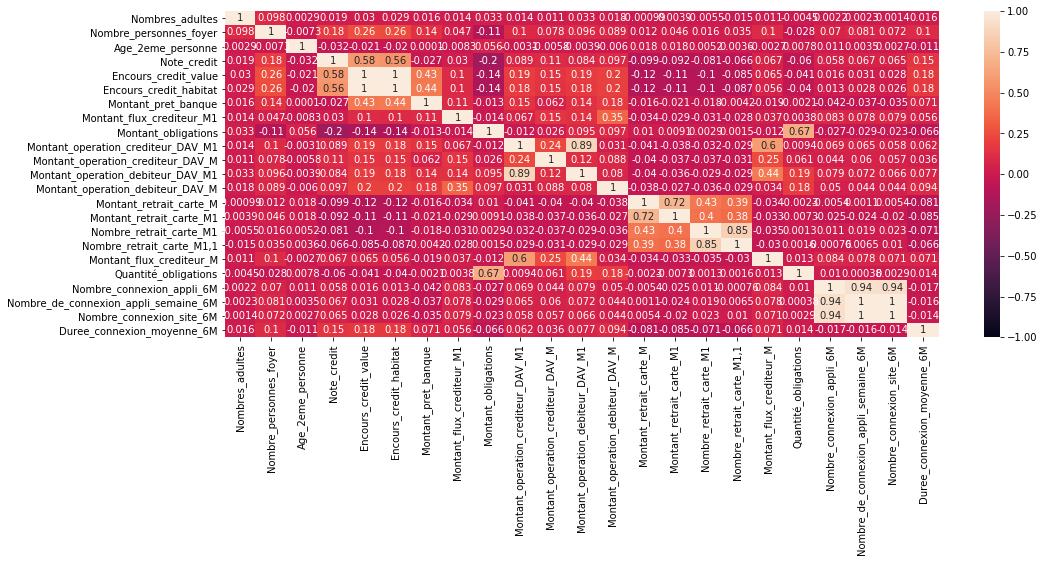

In [162]:
plt.figure(figsize=(16,6))
sns.heatmap(df[infos_globales_cols+operations_bancaires_cols+extra_financiers_cols].corr(),vmin=-1,vmax=1,annot=True)
plt.show()

**Matrice de corrélation**

Ce regroupement par catégories nous permet d'identifier des matrices dans la matrice de corrélation : ce qui traduit le lien entre certaines variables d'une même catégorie.<br>
Certaines catégories sont (faiblement) corrélées entre elles : <br> 
* Informations globales -- Opérations globales

## Analyse de [Output]

#### On analyse la répartition de output

In [179]:
df.groupby(['Output','CSP']).count().iloc[:,:5]

ID  Nombres_adultes  Nombre_personnes_foyer  Age_2eme_personne  \
Output CSP                                                                      
FAUX   CSP+  1098             1095                    1098               1098   
       CSP-  1071             1066                    1065               1070   
VRAI   CSP+   433              431                     432                433   
       CSP-   400              400                     398                399   

             Note_credit  
Output CSP                
FAUX   CSP+         1097  
       CSP-         1070  
VRAI   CSP+          432  
       CSP-          398

In [171]:
df.groupby('Output').mean()

,ID,Nombres_adultes,Nombre_personnes_foyer,Age_2eme_personne,Note_credit,Encours_credit_value,Encours_credit_habitat,Montant_flux_crediteur_M1,Montant_obligations,Montant_operation_crediteur_DAV_M1,...,Montant_retrait_carte_M1,Nombre_retrait_carte_M1,"Nombre_retrait_carte_M1,1",Quantité_obligations,Nombre_connexion_appli_6M,Nombre_de_connexion_appli_semaine_6M,Nombre_connexion_site_6M,Duree_connexion_moyenne_6M,Montant_flux_crediteur_M,Montant_pret_banque
Output,,,,,,,,,,,,,,,,,,,,,
FAUX,1513.889963,1.495877,1.982149,3104.233212,3.689792,54775.005772,53619.346291,2612.539221,11763.285780,6566.691095,...,32.562499,0.184484,0.194491,168847.061986,19.843087,24.384091,30.621044,94.526004,3226.279580,127482.000580
VRAI,1485.861078,2.055746,2.550787,40.291117,5.150869,101902.089018,99566.180852,5580.716901,7554.697473,11892.396617,...,5.920825,0.031224,0.037325,261470.252308,25.363493,32.527161,40.401109,124.905767,6267.828968,135824.367297
